In [3]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import math
import soundfile as sf

In [4]:
sig, sr = librosa.load('JCT.wav' , sr = 16000)

In [6]:
#zero padding
window_length = 512
shift = int(window_length / 2)
zero = np.zeros([int(window_length - (shift+1)) + int(math.ceil(len(sig)/shift)*shift-(len(sig)-1))])
sig = np.concatenate([sig,zero],axis=None)
print(len(sig))

37376


In [64]:
print(len(sig)-(window_length-1))
print(len(sig))

36865
37376


In [7]:
window = np.hanning(window_length)
STFT = []
for i in range(0, len(sig)-(window_length-1), shift):
    print(i)
    idx_list = []
    for idx in range(i,i+window_length,1):
        idx_list.append(idx)
    globals()['F{}'.format(i)] = []
    for k in range(0, window_length,1):
        F = 0
        for l, idx in enumerate(idx_list):
            value = ((2*np.pi)*k*l)/window_length
            F = F + ( window[l]*sig[idx]*complex(np.cos(value),np.sin(value)) )
        globals()['F{}'.format(i)].append(F)
        
    STFT.append(globals()['F{}'.format(i)])
            

0
256
512
768
1024
1280
1536
1792
2048
2304
2560
2816
3072
3328
3584
3840
4096
4352
4608
4864
5120
5376
5632
5888
6144
6400
6656
6912
7168
7424
7680
7936
8192
8448
8704
8960
9216
9472
9728
9984
10240
10496
10752
11008
11264
11520
11776
12032
12288
12544
12800
13056
13312
13568
13824
14080
14336
14592
14848
15104
15360
15616
15872
16128
16384
16640
16896
17152
17408
17664
17920
18176
18432
18688
18944
19200
19456
19712
19968
20224
20480
20736
20992
21248
21504
21760
22016
22272
22528
22784
23040
23296
23552
23808
24064
24320
24576
24832
25088
25344
25600
25856
26112
26368
26624
26880
27136
27392
27648
27904
28160
28416
28672
28928
29184
29440
29696
29952
30208
30464
30720
30976
31232
31488
31744
32000
32256
32512
32768
33024
33280
33536
33792
34048
34304
34560
34816
35072
35328
35584
35840
36096
36352
36608
36864


In [8]:
STFT = np.array(STFT)

In [30]:
ISTFT = []
for m in range(0, len(STFT),1):
    print(m)
    globals()['y{}'.format(m)] = []
    for l in range(0, window_length,1):
        y = 0
        for k in range(0, window_length,1):
            value = -1 * (((2*np.pi)*k*l)/window_length)
            y = y + (STFT[m,k]*complex(np.cos(value),np.sin(value)) )
        y = y * (1/window_length)
        globals()['y{}'.format(m)].append(y)
        
    ISTFT.append(globals()['y{}'.format(m)])
            

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144


[[(-6.797947621484113e-17+3.3881317890172014e-16j), (-1.3689253631007795e-07+2.2215302514227986e-16j), (-7.190718455873045e-07+4.742300302451596e-16j), (-2.8660364329193672e-06+1.0332446703786857e-16j), (-4.649018754020705e-06+2.2106882296979435e-16j), (-1.1075884753811594e-05+2.581485372687986e-16j), (-1.3059190889368655e-05+1.6523241108679088e-16j), (-1.2002596804067047e-05+1.6761765586625899e-16j), (-2.609452015997862e-05+7.405100838075995e-17j), (-3.451915100501448e-05-1.3053794156725473e-16j)]]
hey
[[(-6.797947621484113e-17+3.3881317890172014e-16j), (-1.3689253631007795e-07+2.2215302514227986e-16j), (-7.190718455873045e-07+4.742300302451596e-16j), (-2.8660364329193672e-06+1.0332446703786857e-16j), (-4.649018754020705e-06+2.2106882296979435e-16j), (-1.1075884753811594e-05+2.581485372687986e-16j), (-1.3059190889368655e-05+1.6523241108679088e-16j), (-1.2002596804067047e-05+1.6761765586625899e-16j), (-2.609452015997862e-05+7.405100838075995e-17j), (-3.451915100501448e-05-1.30537941567

In [63]:
print(ISTFT.shape)
a = []
for i in range(0,len(ISTFT),1):
    a.append(STFT[i,:256])
    
a = np.array(a)
a.reshape(1,-1)
print(a.shape)

(145, 512)
(145, 256)


In [29]:
sf.write('ISTFT_output.wav', ISTFT, sr, 'PCM_16')

C:\Users\yegee\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


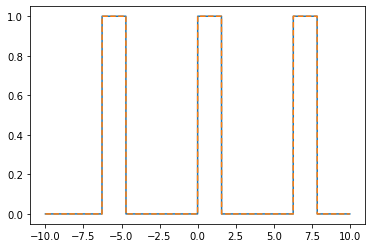

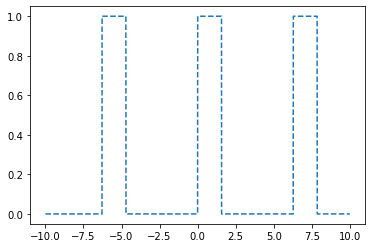

In [21]:
  
from scipy import signal
from scipy.fft import fft, ifft, fftfreq
import numpy as np
import matplotlib.pyplot as plt


t = np.linspace(-10, 10, 10000)
y = (signal.square(t,duty = 0.25)+1)/2
Y = fft(y,n=len(t))

#for i in range(5,5):
i = 4
n = 10000
y_i = ifft(Y,n=n) #*n/10000 - 0.1) #or (2**(3*i+1))
t = np.linspace(-10, 10, n)
plt.plot(t,y_i)
t = np.linspace(-10, 10, 10000)

plt.plot(t,y,'--')
plt.show()

abss = abs(y_i)

plt.plot(t, abss, '--')

In [15]:
print(y_i[0:10])
print(y[0:10])

[ 4.54747351e-17+3.73034936e-17j -4.54747351e-17-3.67261777e-17j
  0.00000000e+00-8.52651283e-18j  1.36424205e-16+2.70894418e-18j
  0.00000000e+00-2.93098879e-17j  4.54747351e-17-1.27897692e-17j
  0.00000000e+00+2.15827356e-17j  1.36424205e-16-3.72590847e-17j
 -1.36424205e-16+4.54747351e-17j -9.09494702e-17-1.03339559e-16j]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
